In [35]:
# Read packages into Python library
import pandas as pd
import numpy as np
import csv
import os
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
from IPython.display import display

#result = pandas.read_csv('X:\data.csv')
#print(result)


In [55]:
# Create simulated datset in Python:
#videogamedf = pd.read_csv("C:\\Users\\Maria\\Documents\\Maria 2019\\Maria 2019 Autumn\\Data science\\1.csv")
data = pd.read_csv('C:\\Users\\Maria\\Documents\\Maria 2019\\Maria 2019 Autumn\\Data science\\1.csv',header=0,encoding = 'unicode_escape')
# Create and print correlation matrix:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.00,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.30,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.00,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.50,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.60,129.0,Nintendo,E
5,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.40,594.0,Nintendo,E
6,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.60,464.0,Nintendo,E
7,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.70,146.0,Nintendo,E
8,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.30,106.0,Good Science Studio,E
9,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.40,52.0,Nintendo,E


In [38]:
data['Global_Sales'].describe() 

count    6961.000000
mean        0.771715
std         1.947171
min         0.010000
25%         0.110000
50%         0.290000
75%         0.750000
max        82.530000
Name: Global_Sales, dtype: float64

In [44]:
corr = data.corr()
print(corr)

                 Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.016565  0.041041 -0.038608     0.041985   
NA_Sales               -0.016565  1.000000  0.840139  0.467437     0.727026   
EU_Sales                0.041041  0.840139  1.000000  0.519228     0.716371   
JP_Sales               -0.038608  0.467437  0.519228  1.000000     0.394451   
Other_Sales             0.041985  0.727026  0.716371  0.394451     1.000000   
Global_Sales            0.006323  0.955507  0.938747  0.612795     0.804417   
Critic_Score           -0.008385  0.234219  0.212429  0.146418     0.191614   
Critic_Count            0.202541  0.282850  0.264324  0.168316     0.238354   
User_Count              0.198886  0.244621  0.282738  0.072750     0.239236   

                 Global_Sales  Critic_Score  Critic_Count  User_Count  
Year_of_Release      0.006323     -0.008385      0.202541    0.198886  
NA_Sales             0.955507      0.234219      0.282850    0.24

In [56]:
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
corr.style.background_gradient(cmap='coolwarm')

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1,-0.0165648,0.0410406,-0.0386082,0.0419846,0.00632269,-0.00838454,0.202541,0.198886
NA_Sales,-0.0165648,1,0.840139,0.467437,0.727026,0.955507,0.234219,0.28285,0.244621
EU_Sales,0.0410406,0.840139,1,0.519228,0.716371,0.938747,0.212429,0.264324,0.282738
JP_Sales,-0.0386082,0.467437,0.519228,1,0.394451,0.612795,0.146418,0.168316,0.0727498
Other_Sales,0.0419846,0.727026,0.716371,0.394451,1,0.804417,0.191614,0.238354,0.239236
Global_Sales,0.00632269,0.955507,0.938747,0.612795,0.804417,1,0.237609,0.289338,0.263093
Critic_Score,-0.00838454,0.234219,0.212429,0.146418,0.191614,0.237609,1,0.394323,0.26425
Critic_Count,0.202541,0.28285,0.264324,0.168316,0.238354,0.289338,0.394323,1,0.362428
User_Count,0.198886,0.244621,0.282738,0.0727498,0.239236,0.263093,0.26425,0.362428,1


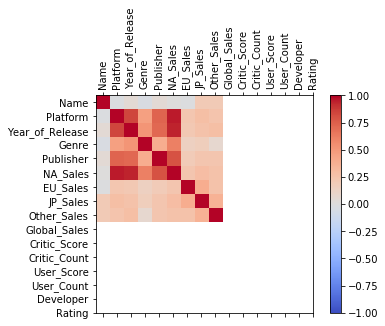

In [57]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

#https://medium.com/@sebastiannorena/finding-correlation-between-many-variables-multidimensional-dataset-with-python-5deb3f39ffb3

In [58]:
pearsoncorr = data.corr(method='pearson')
pearsoncorr

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.016565,0.041041,-0.038608,0.041985,0.006323,-0.008385,0.202541,0.198886
NA_Sales,-0.016565,1.000000,0.840139,0.467437,0.727026,0.955507,0.234219,0.282850,0.244621
EU_Sales,0.041041,0.840139,1.000000,0.519228,0.716371,0.938747,0.212429,0.264324,0.282738
JP_Sales,-0.038608,0.467437,0.519228,1.000000,0.394451,0.612795,0.146418,0.168316,0.072750
Other_Sales,0.041985,0.727026,0.716371,0.394451,1.000000,0.804417,0.191614,0.238354,0.239236
Global_Sales,0.006323,0.955507,0.938747,0.612795,0.804417,1.000000,0.237609,0.289338,0.263093
Critic_Score,-0.008385,0.234219,0.212429,0.146418,0.191614,0.237609,1.000000,0.394323,0.264250
Critic_Count,0.202541,0.282850,0.264324,0.168316,0.238354,0.289338,0.394323,1.000000,0.362428
User_Count,0.198886,0.244621,0.282738,0.072750,0.239236,0.263093,0.264250,0.362428,1.000000


In [59]:
data['Global_Sales'].corr(data['User_Score'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [60]:
int('User_Score')

ValueError: invalid literal for int() with base 10: 'User_Score'